In [539]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [540]:
POSITIVE  = r'/Users/teguhsatya/Dev/segeralulus/Dataset/100 Data/Positive'

In [541]:
images = {}
for fname in os.listdir(POSITIVE):
    f = fname.split('.')[0]
    images[f] = cv2.imread(os.path.join(os.path.join(POSITIVE, fname)))
    images[f] = cv2.cvtColor(images[f], cv2.COLOR_BGR2RGB)

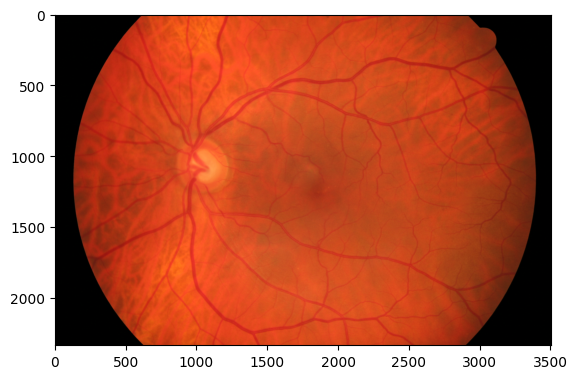

In [542]:
plt.imshow(images['D1_g_1'])

In [543]:
def resize_all(imgs, prcnt=50):
    resized = {}
    for img in imgs:
        resized[img] = cv2.resize(imgs[img], (int(imgs[img].shape[1]*prcnt/100), int(imgs[img].shape[0]*prcnt/100)), cv2.INTER_AREA)
    return resized

In [544]:
rsz_imgs = resize_all(images)

In [731]:
def display_all(imgs, subs, use_gray=False):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=(18, 10))
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            #if not use_gray:
            axs[i, j].imshow(list(imgs.values())[k], 'gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            # else:
            #     axs[i, j].imshow(list(imgs.values())[k], cmap='gray')
            #     axs[i, j].set_title(list(imgs.keys())[k])
            #     axs[i, j].axis('off')
            k+=1
            
def display_all_with(imgs, subs, cc, use_gray=True):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=(18, 10))
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k][:,:,cc], cmap='gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
        

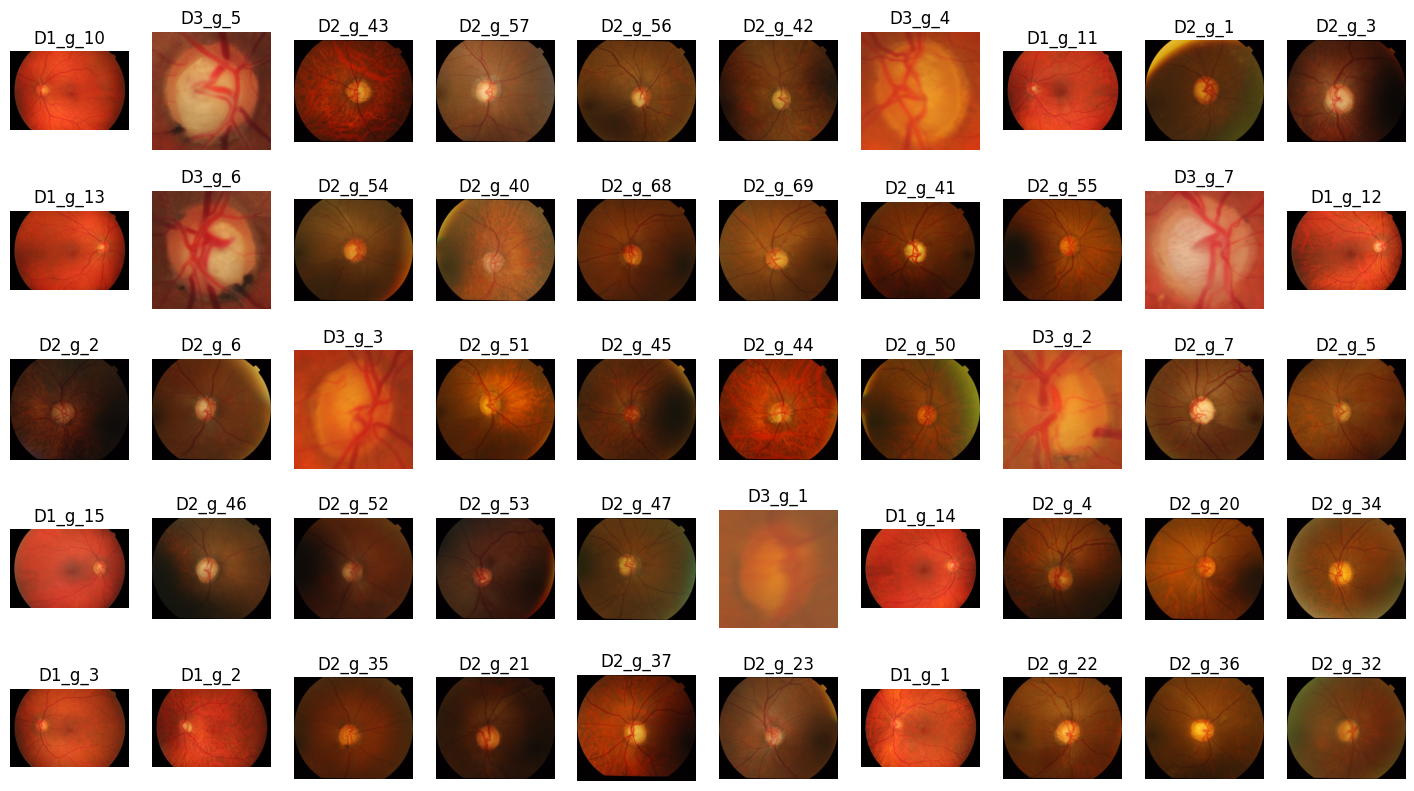

In [546]:
display_all(rsz_imgs, (5,10), False)

In [547]:
def convert_all(imgs, cvt):
    cvtd= {}
    for img in imgs:
        cvtd[img] = cv2.cvtColor(imgs[img], eval(cvt))
    return cvtd

In [548]:
ycc = convert_all(rsz_imgs, 'cv2.COLOR_RGB2LUV')

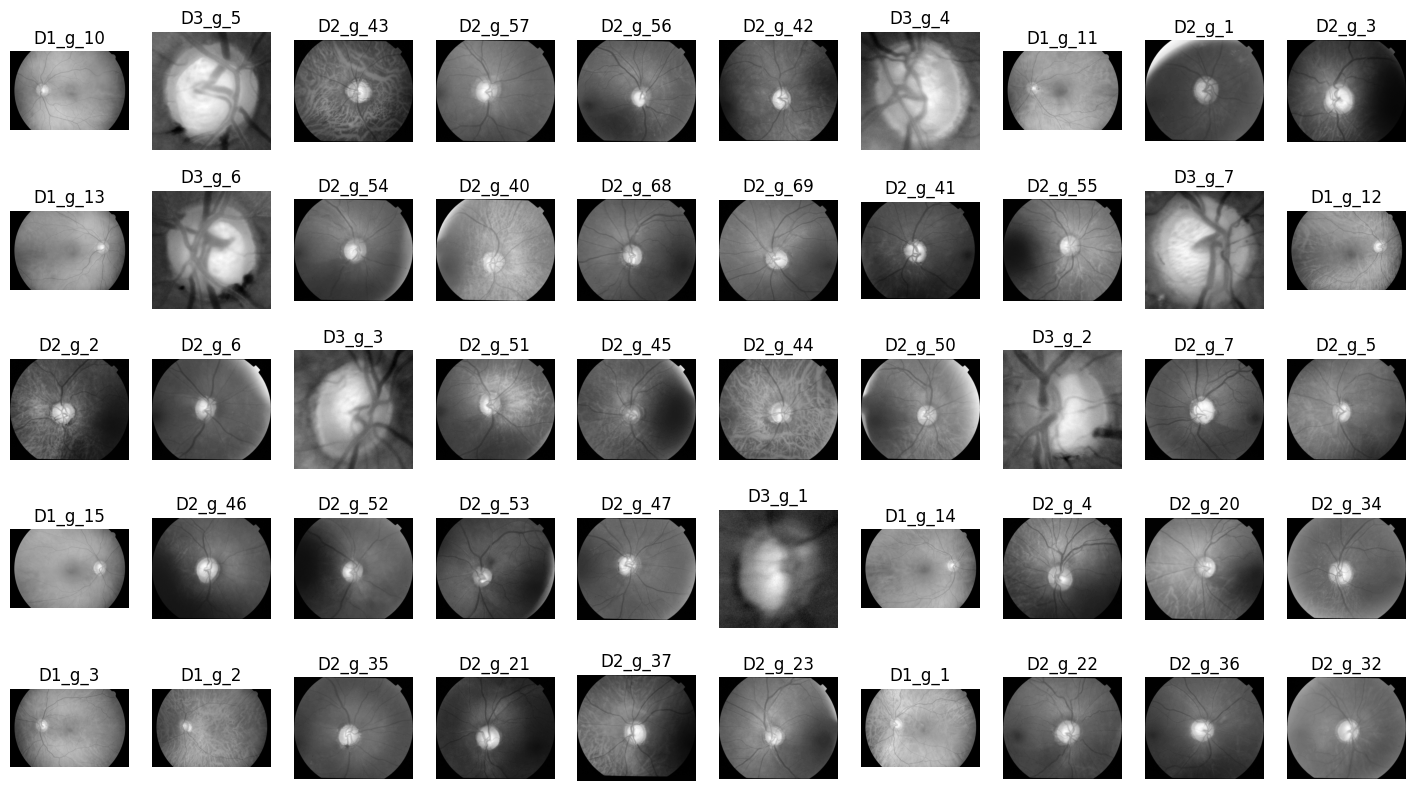

In [549]:
display_all_with(ycc, (5,10), 0)

In [550]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [782]:
def get_the_motherfucking_roi(imgs):
    rois = {}
    gray_img = {}
    wlim = 135
    for img in imgs:
        if imgs[img].shape[0] > 400:
            cropped = imgs[img][150:-90,200:-150]
            gray_img = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
            xmax = cv2.minMaxLoc(gray_img)[3][0]
            ymax = cv2.minMaxLoc(gray_img)[3][1]
            rois[img] = cropped[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]
            
    display_all(rois, (5, 17), True)
    

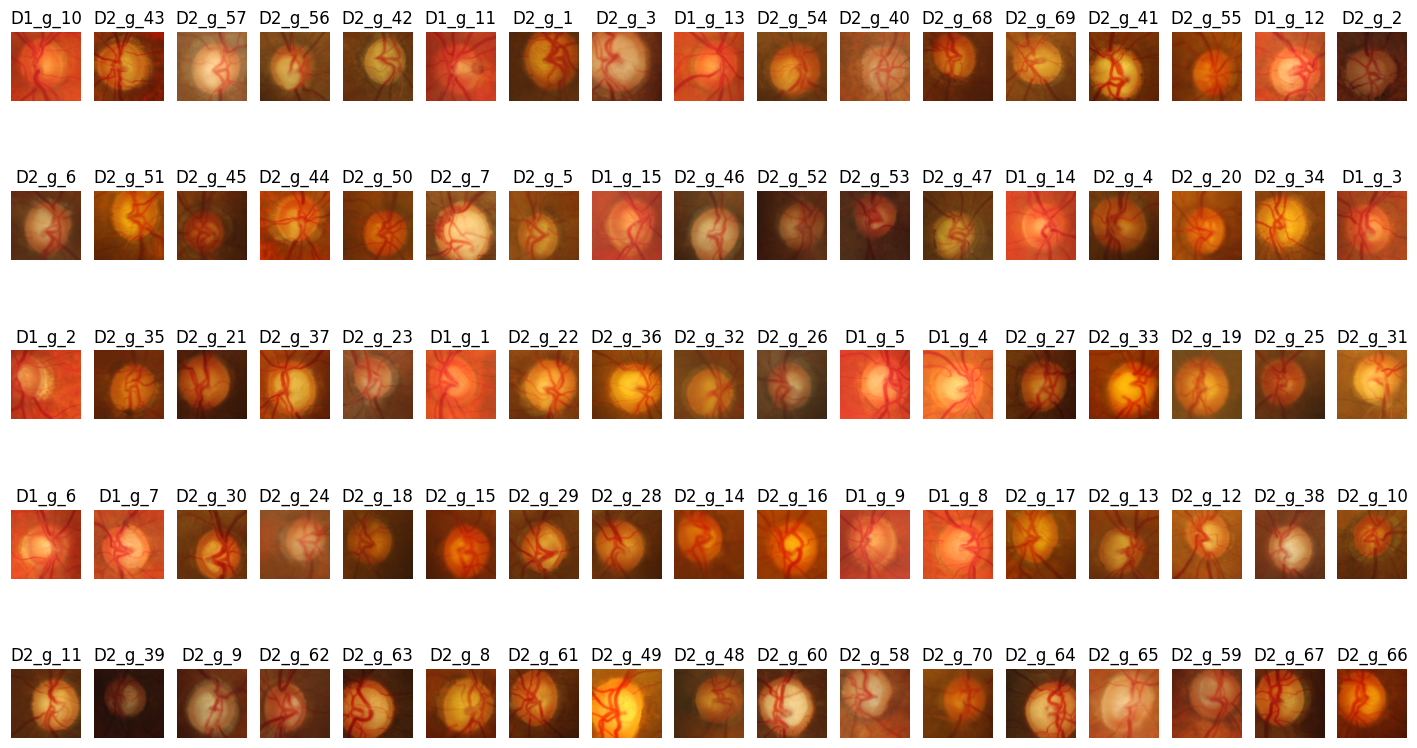

In [783]:
get_the_motherfucking_roi(rsz_imgs)

In [ ]:
plt.imshow(rsz_imgs['D2_g_1'][300:,100:-100])

In [ ]:
plt.imshow(rsz_imgs['D1_g_10'][300:,100:-100])